### For n = 1000 and K = 5, create a K-sparse vector s of Fourier coefficients in a Fourier basis Ψ. For each p from 1 to 100, create a Gaussian random sampling matrix C to create a measurement vector y = CΨs. Use compressed sensing based on this measurement to estimate sˆ. For each p, repeat this with at least 10 realizations of the random measurement matrix C. Plot the average relative error of ||sˆ−s||2/||s|| versus p. Explain the trends. Also plot the average l1 and l0 error versus p.

In [1]:
import numpy as np

# Parameters
n = 1000  # Length of the vector
K = 5     # Number of non-zero coefficients

# Initialize the vector s as a zero vector
s = np.zeros(n, dtype=complex)

# Generate K unique random indices between 0 and n-1
selected_indices = np.random.choice(n, K, replace=False)

# Generate random Fourier coefficients for the selected indices
for index in selected_indices:
    # Generate random complex numbers for the coefficients
    real_part = np.random.uniform(-1, 1)
    imag_part = np.random.uniform(-1, 1)
    complex_coefficient = real_part + 1j * imag_part
    
    # Set the coefficient in the vector s
    s[index] = complex_coefficient

# The vector s is now K-sparse in the Fourier basis Ψ


In [2]:
def create_fourier_basis(n):
    # Create an empty n*n matrix
    basis = np.zeros((n, n), dtype=complex)

    # Fill in the elements of the DFT matrix
    for i in range(n):
        for j in range(n):
            basis[i, j] = np.exp(-2j * np.pi * i * j / n) / np.sqrt(n)

    return basis

# Set the size of the Fourier basis (n)
fourier_basis = create_fourier_basis(n)

## Testing for p =1

In [3]:
p = 1
C = np.random.randn(p,n)
y = C @ fourier_basis @ s
import cvxpy as cp
s_hat = cp.Variable(n, complex=True)

# Define the optimization problem (minimize L1-norm)
problem = cp.Problem(cp.Minimize(cp.norm(s_hat, 1)), [y == C @ fourier_basis @ s_hat])

# Solve the problem
problem.solve()

# The estimated signal s^ is in the s_hat variable
estimated_s = s_hat.value

# Print the estimated s^
print(estimated_s)

[-1.85009487e-14+2.95101289e-14j  2.44337480e-14-4.05850526e-14j
 -9.00116227e-13+5.51968135e-13j -2.84293684e-14+3.42244642e-14j
 -3.71669621e-14+2.12215594e-14j  2.41344918e-14-2.70310080e-14j
 -1.16717492e-14-3.24154904e-14j -3.19548897e-15+3.33504981e-14j
 -8.12121288e-15-5.03320433e-14j -1.39350246e-14-9.79014613e-15j
  3.89014329e-14-1.21872058e-14j  1.91697684e-14+2.91643920e-14j
 -8.62011575e-16+3.34308488e-14j -5.66564399e-14+2.52222109e-16j
  4.36768022e-15+1.50186842e-14j -2.85775095e-14-5.80707637e-14j
  5.05446296e-16-5.03208074e-14j -2.00256486e-14-4.63533497e-14j
 -1.97521554e-14+3.96952480e-14j -6.19578336e-14-3.28886307e-15j
 -4.33114068e-14+9.81055505e-15j -1.73708967e-14-2.00654892e-14j
 -6.84126176e-16+3.91115051e-14j -1.02806274e-14-3.61286587e-14j
  2.77553713e-14-3.62516334e-14j -2.19304870e-14-8.45513164e-15j
  1.18580126e-14-4.50426664e-14j  3.61351303e-14+1.89444560e-14j
  8.08507023e-15-2.14395631e-14j  9.79618799e-16+4.65355095e-14j
 -3.72393988e-14+2.902525

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


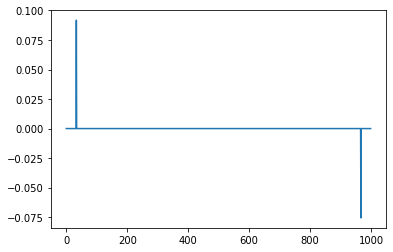

In [4]:
import matplotlib.pyplot as plt
plt.plot(estimated_s)
plt.show()

In [5]:
estimated_s = np.zeros((100,n), dtype=complex)
for p in range(1,101):
    C = np.random.randn(p,n)
    y = C @ fourier_basis @ s
    s_hat = cp.Variable(n, complex=True)
    problem = cp.Problem(cp.Minimize(cp.norm(s_hat, 1)), [y == C @ fourier_basis @ s_hat])
    problem.solve()
    estimated_s[p-1,:] = s_hat.value

In [6]:
result = np.zeros(100)
l1_error = np.zeros(100)
l0_error = np.zeros(100)
for p in range(1,101):
    distance_squared = np.sum(np.abs(s - estimated_s[p-1,:].T) ** 2)
    norm_squared = np.sum(np.abs(s) ** 2)
    l1_error[p-1] = np.sum(np.abs(s - estimated_s[p-1,:].T))
    l0_error[p-1] = np.count_nonzero(s - estimated_s[p-1,:].T)
    result[p-1] = distance_squared / norm_squared

## l_1 and l_0 error

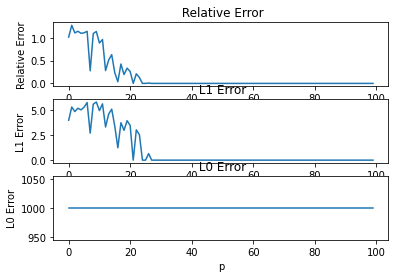

In [7]:
plt.subplot(3, 1, 1)
plt.plot(result)
plt.title(' Relative Error')
plt.xlabel('p')
plt.ylabel('Relative Error')

# Plot the average L1 error
plt.subplot(3, 1, 2)
plt.plot(l1_error)
plt.title(' L1 Error')
plt.xlabel('p')
plt.ylabel('L1 Error')

# Plot the average L0 error
plt.subplot(3, 1, 3)
plt.plot(l0_error)
plt.title(' L0 Error')
plt.xlabel('p')
plt.ylabel('L0 Error')

plt.show()

## For 10 realizations

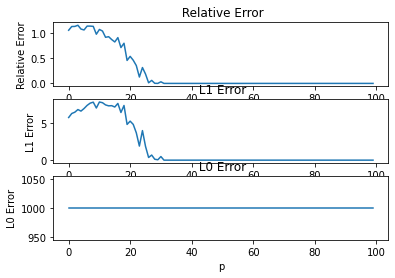

In [8]:
s = np.zeros(n, dtype=complex)
selected_indices = np.random.choice(n, K, replace=False)

# Generate random Fourier coefficients for the selected indices
for index in selected_indices:
    # Generate random complex numbers for the coefficients
    real_part = np.random.uniform(-1, 1)
    imag_part = np.random.uniform(-1, 1)
    complex_coefficient = real_part + 1j * imag_part
    
    # Set the coefficient in the vector s
    s[index] = complex_coefficient


def create_fourier_basis(n):
    # Create an empty n*n matrix
    basis = np.zeros((n, n), dtype=complex)

    # Fill in the elements of the DFT matrix
    for i in range(n):
        for j in range(n):
            basis[i, j] = np.exp(-2j * np.pi * i * j / n) / np.sqrt(n)

    return basis

# Set the size of the Fourier basis (n)
fourier_basis = create_fourier_basis(n)

avg_result = np.zeros(100)
avg_l1_error = np.zeros(100)
avg_l0_error = np.zeros(100)

for p in range(1,101):
    result=[]
    l1=[]
    l0=[]
    for _ in range(10): #10 realizations
        C = np.random.randn(p,n)
        y = C @ fourier_basis @ s
        s_hat = cp.Variable(n, complex=True)
        problem = cp.Problem(cp.Minimize(cp.norm(s_hat, 1)), [y == C @ fourier_basis @ s_hat])
        problem.solve()
        ans = s_hat.value
        distance_squared = np.sum(np.abs(s - ans) ** 2)
        norm_squared = np.sum(np.abs(s) ** 2)
        l1.append(np.sum(np.abs(s - ans)))
        l0.append(np.count_nonzero(s - ans))
        result.append(distance_squared / norm_squared)
    avg_l1_error[p-1] = np.sum(l1)/10
    avg_l0_error[p-1] = np.sum(l0)/10
    avg_result[p-1] = np.sum(result)/10


plt.subplot(3, 1, 1)
plt.plot(avg_result)
plt.title(' Relative Error')
plt.xlabel('p')
plt.ylabel('Relative Error')

# Plot the average L1 error
plt.subplot(3, 1, 2)
plt.plot(avg_l1_error)
plt.title(' L1 Error')
plt.xlabel('p')
plt.ylabel('L1 Error')

# Plot the average L0 error
plt.subplot(3, 1, 3)
plt.plot(avg_l0_error)
plt.title(' L0 Error')
plt.xlabel('p')
plt.ylabel('L0 Error')

plt.show()       

With increase in p, the error is decreasing. This is evident from the graphs above. Also, this can be understood as follows:
As the dimension of the y increases (as p increases), there is more information available to recover the data from. 